In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import geopandas as gpd
import xarray as xr
import rioxarray
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import matplotlib as mpl
from cmcrameri import cm
import cartopy.feature as cf
import cartopy.feature as cf
import regionmask

In [4]:
shp_pan = gpd.read_file(r'Data\shapefiles\panamz.geojson')
folder_metric = r'Data\Datasets\amz\map'
datasets = ['cru', 'gpcc', 'chirps','imerg', 'terra', 'era_land', 'jra55','merra2']
datasets_names = ['CRU', 'GPCC', 'CHIRPS','IMERG-V6', 'TerraClimate', 'ERA5-Land', 'JRA55','MERRA2']
stations = gpd.read_file(r'Data\Datasets\amz\map\stations.geojson')
regions = gpd.read_file(r'Data\shapefiles\ANA_amz.geojson', driver='GeoJSON')
regions_mask = regionmask.from_geopandas(regions, names='Region')

In [5]:
from matplotlib.lines import Line2D
plt.rcParams.update({'font.size': 18})
regions_list = ['Western', 'Northern', 'Southern', 'Eastern']
regions_replace = { 0:'Southern', 1:'Eastern',2:'Western', 3:'Northern'}
wong = ['#882255','#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7','#999999']
wong_b = ['#882255','#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7','#000000']
hue_order = datasets_names.copy()
hue_order.append('Stations')
legend_elements = [Line2D([0], [0],  marker='s', color='w', label=hue_order[i], markerfacecolor=wong[i], markersize=12) for i in range(len(wong))]
legend_elements_b = [Line2D([0], [0],  marker='s', color='w', label=hue_order[i], markerfacecolor=wong_b[i], markersize=12) for i in range(len(wong_b))]
seasons = ['DJF', 'MAM', 'JJA', 'SON']

# map

In [55]:
ds_dict = {}
for i, dataset in enumerate(datasets):
    ds = xr.open_dataset(os.path.join(folder_metric, dataset + '.nc'))
    #create mask from regions
    mask = regions_mask.mask(ds, lon_name='lon', lat_name='lat')
    ds['Region'] = mask
    ds_mean = ds.mean(dim='year')
    ds_mean['sd'] = ds.std(dim='year')['pr']
    ds_mean['cv'] = ds_mean['sd']/ds_mean['pr']
    ds_dict[datasets_names[i]] = ds_mean

c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\numpy\lib\nanfunctions.py:1878: R

In [56]:
df_stat = pd.read_csv(r'Data\Datasets\amz\map\stations_ts.csv', index_col=0)
#calculate CV for each station
df_stat_mean = df_stat.groupby('Code').mean().reset_index()
df_stat_mean['sd'] = df_stat.groupby('Code')['Total'].std().reset_index()['Total']
df_stat_mean['cv'] = df_stat_mean['sd']/df_stat_mean['Total']
#merge with stations
stations_cv = stations.merge(df_stat_mean, on = 'Code')

In [57]:
#create a df with all ds in ds_dict
df = pd.DataFrame()
for name in datasets_names:
    dff =  ds_dict[name].to_dataframe().dropna().reset_index(drop=True)
    dff['Dataset'] = name
    df = df.append(dff)
df = df[['cv', 'Region', 'Dataset']]
df['Region'] = df['Region'].replace(regions_replace)

C:\Users\luisg\AppData\Local\Temp\ipykernel_15560\216758052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_15560\216758052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_15560\216758052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_15560\216758052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)


C:\Users\luisg\AppData\Local\Temp\ipykernel_15560\216758052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_15560\216758052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_15560\216758052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_15560\216758052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)


In [58]:
df_stat = stations_cv[['cv', 'Region']].copy()
df_stat['Dataset'] = 'Stations'
df = df.append(df_stat)

C:\Users\luisg\AppData\Local\Temp\ipykernel_15560\3514168593.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_stat)


In [8]:
#create a dictionary withh all datasets
vmin = 0
vmax = 0.3
levels = 11
cmap = mpl.cm.viridis
extend_cbar = 'max'
var = 'cv'
var_stat = 'cv'
label_cbar = 'Coefficient of Variation'

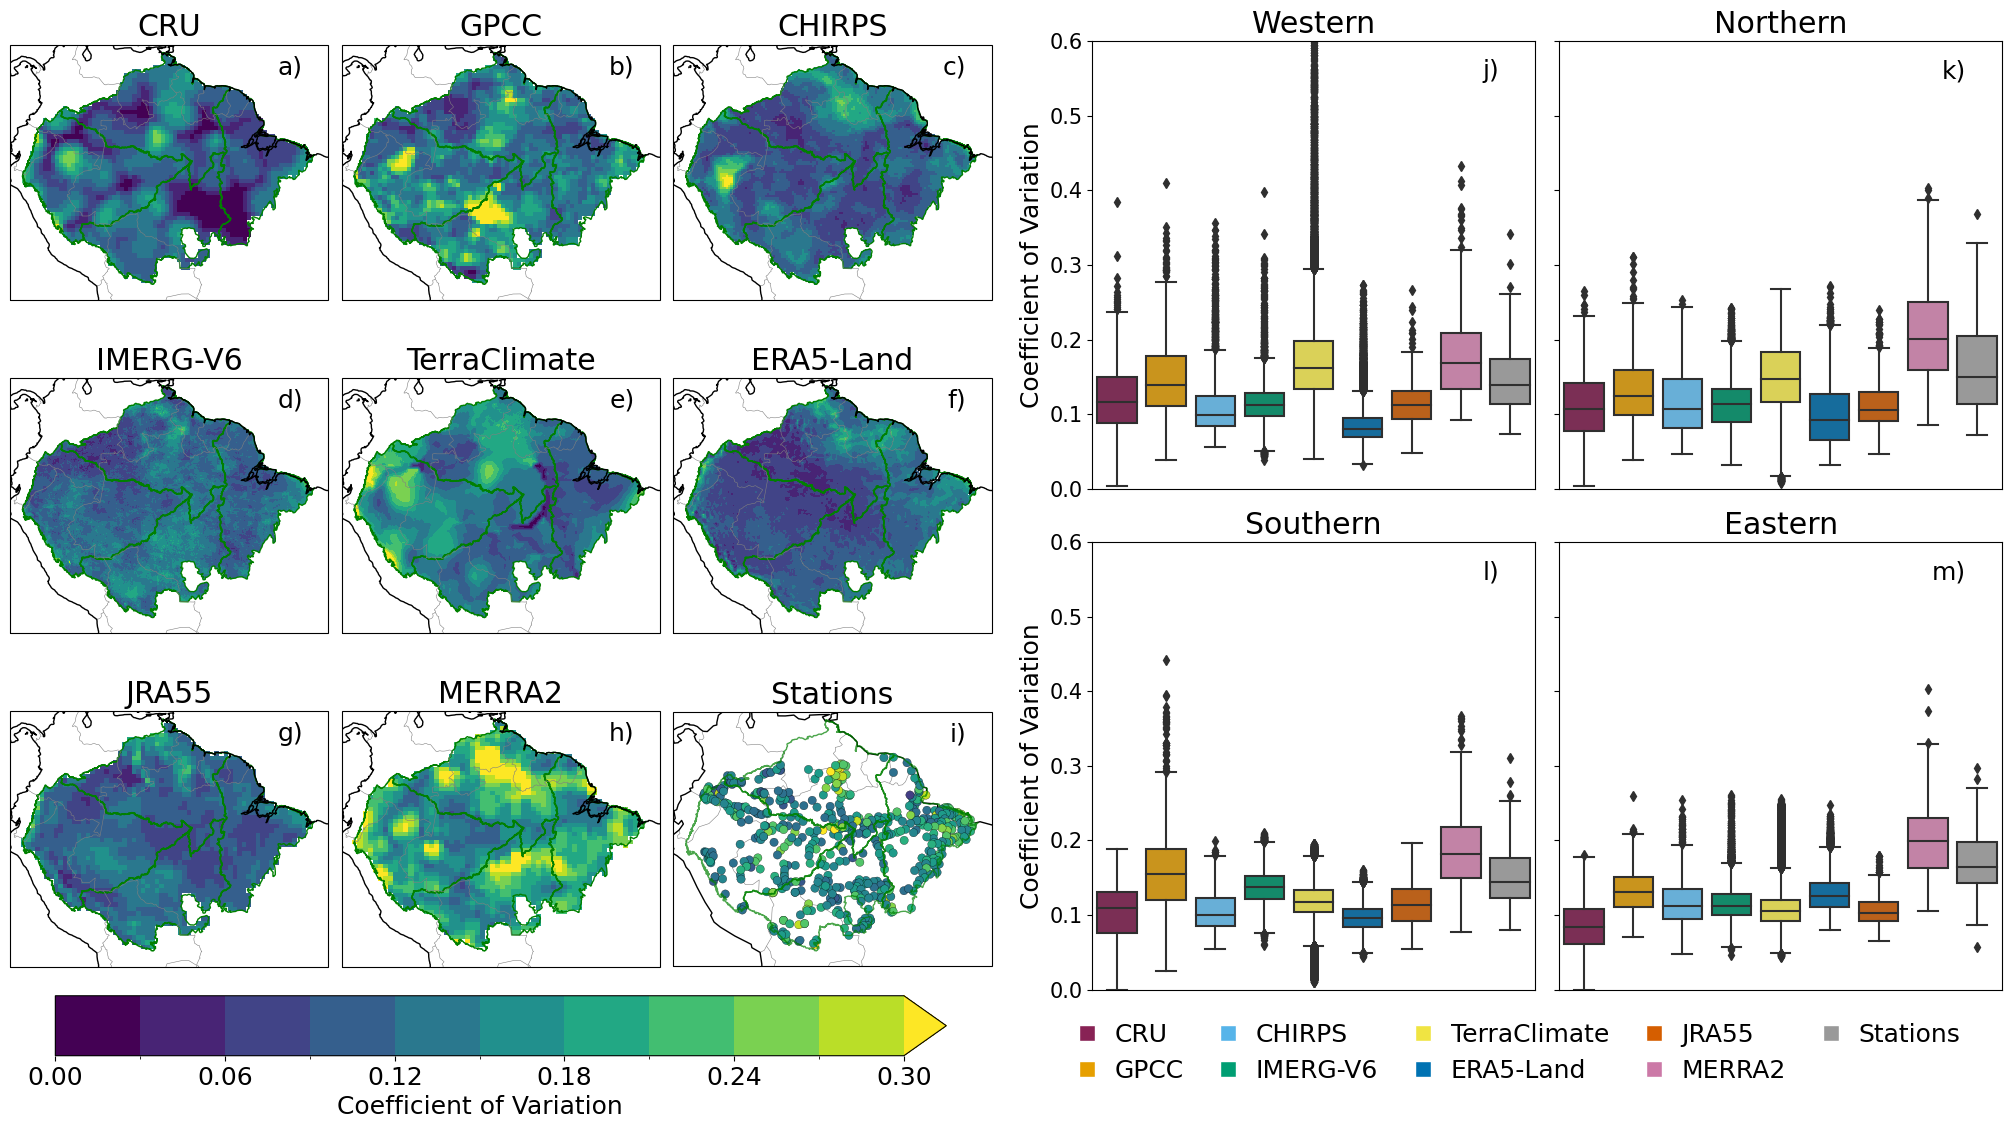

In [9]:
from Data.utils.datasets_plotting import plot_datasets33
fig = plt.figure(layout='constrained', figsize=(20, 10))
subfigs = fig.subfigures(1, 2)
axs_right = subfigs[1].subplots(2, 2, sharex=True, sharey=True)
axs_right = axs_right.flatten()
letters_22 = ['j)', 'k)', 'l)', 'm)']
for i, region in enumerate(regions_list):
    #boxplot of df
    sns.boxplot( y='cv', data=df[df.Region==region], ax=axs_right[i], hue_order=hue_order, palette=wong, hue='Dataset',x='Dataset',dodge=False).get_legend().remove()
    axs_right[i].set_title(region)
    axs_right[i].set_xlabel('')
    axs_right[i].set_ylim(0, 0.6)
    axs_right[i].tick_params(axis='y', which='both', labelsize=15)
    axs_right[i].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    
    if i % 2 == 0:
        axs_right[i].set_ylabel(label_cbar)
    else:
        axs_right[i].set_ylabel('')
    axs_right[i].text(0.92,0.96,  letters_22[i], transform=axs_right[i].transAxes,  fontsize=18, va='top', ha='right')
plot_datasets33(subfigs[0], datasets_names, ds_dict, stations_cv, regions, vmin, vmax, levels, cmap, extend_cbar, var, var_stat, label_cbar)

#create legend in the bottom center of the figure
subfigs[1].legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.1), loc='lower center', ncol=5, frameon=False,handletextpad=0.1,columnspacing=0.8)

In [23]:
data = stations_cv[['geometry','cv']].copy()
data['lon'] = data['geometry'].apply(lambda p: p.x)
data['lat'] = data['geometry'].apply(lambda p: p.y)
data = data.drop(columns=['geometry'])
var = 'cv'

metrics_dict = {}
for name in datasets_names:
    ds = ds_dict[name].copy()
    # Step 2: Assign each point to the grid cells of the 'ds' DataArray
    ds_grid_lon, ds_grid_lat = ds.lon.values, ds.lat.values
    data['lon_bin'] = np.digitize(data['lon'], ds_grid_lon)
    data['lat_bin'] = np.digitize(data['lat'], ds_grid_lat)
    for var in ['cv']:

        # Step 3: Compute the mean value for each grid cell and each year
        grid_cells = data.groupby(['lat_bin', 'lon_bin'])[var].mean().reset_index()
        # Step 4: Create an empty DataArray with NaN values
        empty_grid = np.full((len(ds_grid_lat), len(ds_grid_lon)), np.nan)
        # Step 5: Fill the DataArray with the computed mean values for each year
        for _, row in grid_cells.iterrows():
            #year_idx = np.where(data['year'].unique() == row['year'])[0][0]
            lat_idx, lon_idx = row['lat_bin'], row['lon_bin']
            lat_idx, lon_idx = int(lat_idx), int(lon_idx)
            empty_grid[lat_idx - 1, lon_idx - 1] = row[var]
        # Step 6: Create an xarray DataArray from the result with the year dimension
        #year_coords = data['year'].unique()
        data_array = xr.DataArray(empty_grid,
                                    dims=('lat', 'lon'),
                                    coords={'lat': ds_grid_lat, 'lon': ds_grid_lon})
        # Calculate various metrics
        ds[var + '_stat'] = data_array
    metrics_dict[name] = ds

In [24]:
df_compare = pd.DataFrame()
for name in datasets_names:
    df_comparef =  metrics_dict[name].to_dataframe().dropna().reset_index(drop=True)
    df_comparef['Dataset'] = name
    df_compare = df_compare.append(df_comparef)

df_compare = df_compare[['Region', 'Dataset','cv', 'cv_stat']]
df_compare['Region'] = df_compare['Region'].replace(regions_replace)



C:\Users\luisg\AppData\Local\Temp\ipykernel_19608\1351166378.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(df_comparef)
C:\Users\luisg\AppData\Local\Temp\ipykernel_19608\1351166378.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(df_comparef)
C:\Users\luisg\AppData\Local\Temp\ipykernel_19608\1351166378.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(df_comparef)
C:\Users\luisg\AppData\Local\Temp\ipykernel_19608\1351166378.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(df_comparef)
C:\Users\luisg\A

In [25]:
pal = sns.color_palette("Dark2")
#create a list from pal with the following index: 0,2,5,7
pal = [pal[i] for i in [0,2,5,7]]
regions_list_x = ['Eastern', 'Northern', 'Southern', 'Western']
legend_elements_re = [Line2D([0], [0],  marker='s', color='w', label=regions_list_x[i], markerfacecolor=pal[i], markersize=12) for i in range(len(pal))]

In [28]:
df_rr = df_compare.groupby(['Region','Dataset']).apply(lambda x: x['cv'].corr(x['cv_stat'])).reset_index(name='corr')
df_rr.groupby('Dataset').mean()

C:\Users\luisg\AppData\Local\Temp\ipykernel_19608\161339068.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rr.groupby('Dataset').mean()


,corr
Dataset,
CHIRPS,0.344725
CRU,0.147675
ERA5-Land,0.198475
GPCC,0.299939
IMERG-V6,0.282585
JRA55,0.090151
MERRA2,0.131492
TerraClimate,0.120320


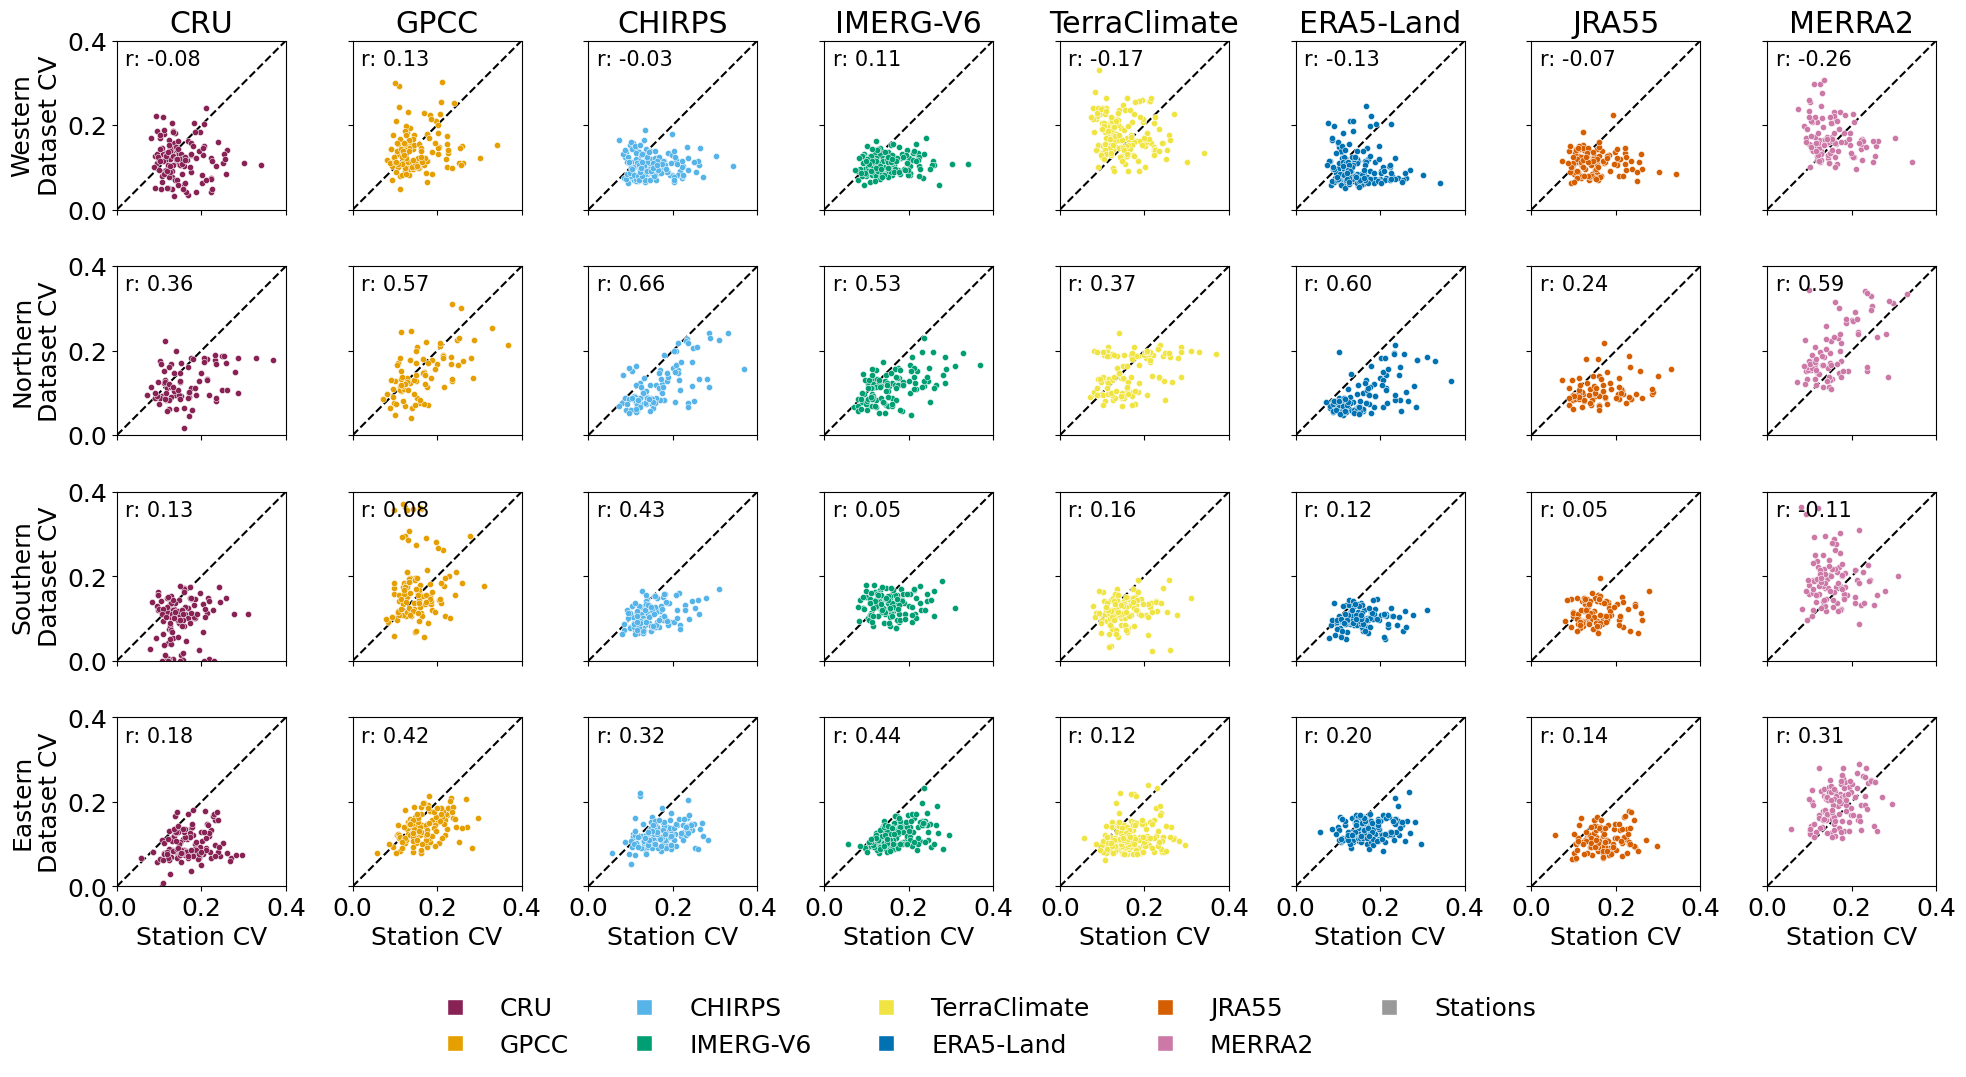

In [40]:
fig, axes = plt.subplots(4,8, figsize=(20,10), sharex=True, sharey=True)
limm = 0.4
for i, name in enumerate(datasets_names):
    df_ds = df_compare[df_compare['Dataset'] == name]
    for j, region in enumerate(regions_list):
        df_plot = df_ds[df_ds['Region'] == region]
        sns.scatterplot(data=df_plot,x='cv_stat', y='cv', ax=axes[j,i], s=20, color=wong[i])
        
        axes[j,i].set_xlabel('Station CV')
        axes[j,i].set_ylabel(region + '\nDataset CV')
        axes[j,i].set_xlim(0,limm)
        axes[j,i].set_ylim(0,limm)
        axes[j,i].plot([0,limm],[0,limm], color='black', linestyle='--',zorder=-30)
        axes[j,i].set_aspect('equal', 'box')
        corr = df_plot['cv_stat'].corr(df_plot['cv'])
        axes[j,i].text(0.05, 0.95, f'r: {corr:.2f}', transform=axes[j,i].transAxes, fontsize=15, verticalalignment='top')
    axes[0,i].set_title(name)
    #calculate the Coefficient of determination
    #axes[7].legend(bbox_to_anchor=(0.5, -0.limm), loc='lower center', ncol=3, frameon=False, fontsize=1limm)

    
    
fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.1), loc='lower center', ncol=5, frameon=False)
plt.tight_layout()

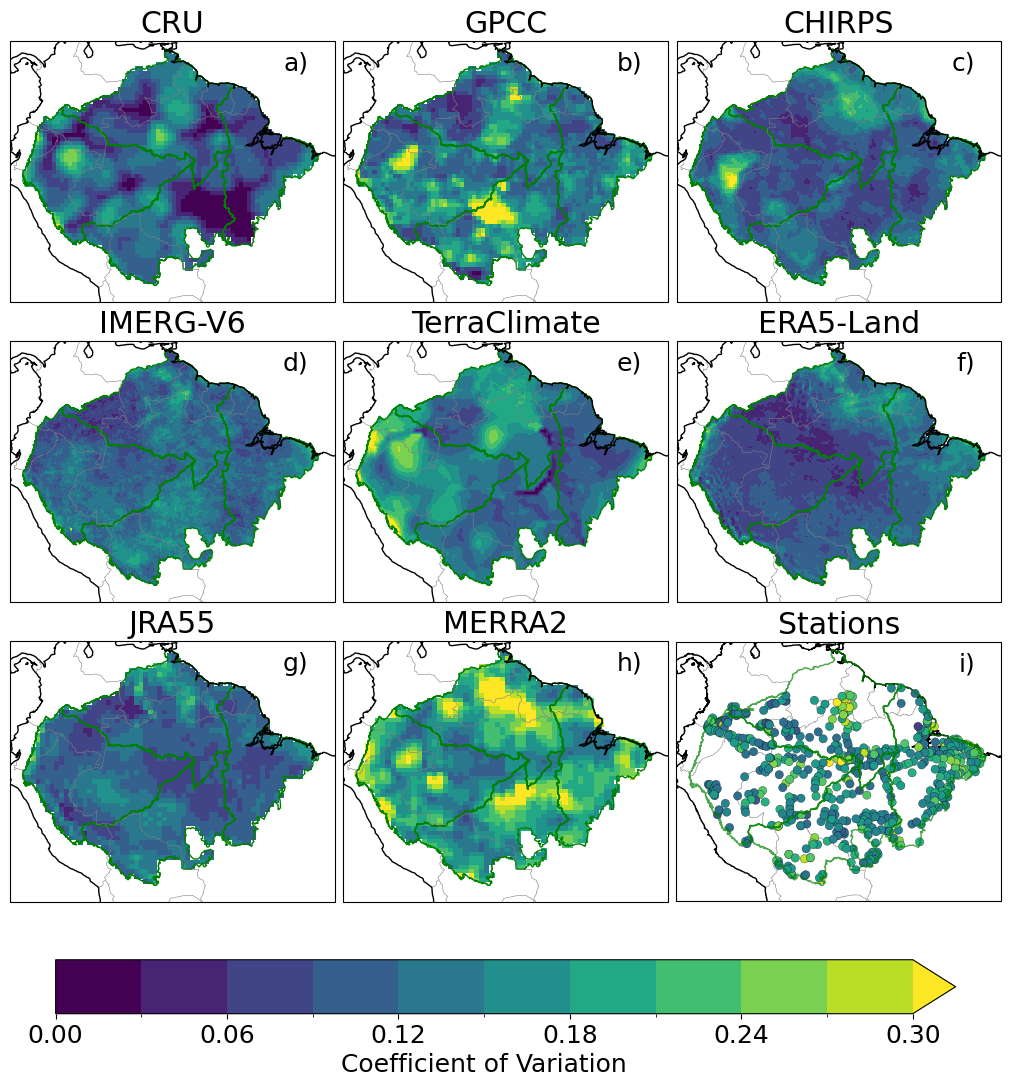

In [21]:
from Data.utils.datasets_plotting import plot_datasets33
fig = plt.figure(layout='constrained', figsize=(10, 9))
plot_datasets33(fig, datasets_names, ds_dict, stations_cv, regions, vmin, vmax, levels, cmap, extend_cbar, var, var_stat, label_cbar)
fig.axes[-1].set_position([0.05, -0.12, 0.9, 0.06])

## pixel

In [16]:
#merge with stations to get the region
df_stat = stations_cv.copy()
# Step 1: Convert GeoDataFrame to DataFrame with point coordinates, rainfall values, and timestamps
data = df_stat[['geometry',  'cv']].copy()
data['lon'] = data['geometry'].apply(lambda p: p.x)
data['lat'] = data['geometry'].apply(lambda p: p.y)
data = data.drop(columns=['geometry'])
var = 'cv'
pixel_dict = {}

for name in datasets_names:
    ds = ds_dict[name].copy()

    # Step 2: Assign each point to the grid cells of the 'ds' DataArray
    ds_grid_lon, ds_grid_lat = ds.lon.values, ds.lat.values

    data['lon_bin'] = np.digitize(data['lon'], ds_grid_lon)
    data['lat_bin'] = np.digitize(data['lat'], ds_grid_lat)

    # Step 3: Compute the mean value for each grid cell and each year
    grid_cells = data.groupby([ 'lat_bin', 'lon_bin'])[var].mean().reset_index()

    # Step 4: Create an empty DataArray with NaN values
    empty_grid = np.full((len(ds_grid_lat), len(ds_grid_lon)), np.nan)

    # Step 5: Fill the DataArray with the computed mean values for each year
    for _, row in grid_cells.iterrows():
        #year_idx = np.where(data['year'].unique() == row['year'])[0][0]
        lat_idx, lon_idx = row['lat_bin'], row['lon_bin']
        lat_idx, lon_idx = int(lat_idx), int(lon_idx)

        empty_grid[lat_idx - 1, lon_idx - 1] = row[var]

    # Step 6: Create an xarray DataArray from the result with the year dimension
    #year_coords = data['year'].unique()
    data_array = xr.DataArray(empty_grid,
                                dims=('lat', 'lon'),
                                coords={'lat': ds_grid_lat, 'lon': ds_grid_lon})
    
    #data_array = data_array.to_dataset(name=var)
    #data_array['Region'] = ds['Region']
    ds['stat'] = data_array
    pixel_dict[name] = ds.where(ds.stat>= 0)


#create a df_p with all ds in ds_dict
df_p = pd.DataFrame()
for name in datasets_names:
    df_pf =  pixel_dict[name].to_dataframe().dropna().reset_index(drop=True)
    df_pf['Dataset'] = name
    df_p = df_p.append(df_pf)
df_p = df_p[['cv', 'Region', 'Dataset']]
df_p['Region'] = df_p['Region'].replace(regions_replace)
df_p_stat = stations_cv[['cv', 'Region']].copy()
df_p_stat['Dataset'] = 'Stations'
df_p = df_p.append(df_p_stat)

C:\Users\luisg\AppData\Local\Temp\ipykernel_15560\1600140718.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_p = df_p.append(df_pf)
C:\Users\luisg\AppData\Local\Temp\ipykernel_15560\1600140718.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_p = df_p.append(df_pf)
C:\Users\luisg\AppData\Local\Temp\ipykernel_15560\1600140718.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_p = df_p.append(df_pf)
C:\Users\luisg\AppData\Local\Temp\ipykernel_15560\1600140718.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_p = df_p.append(df_pf)
C:\Users\luisg\AppData\Local\Temp\ipykernel_15560\1600140718.py:51: FutureWarning: T

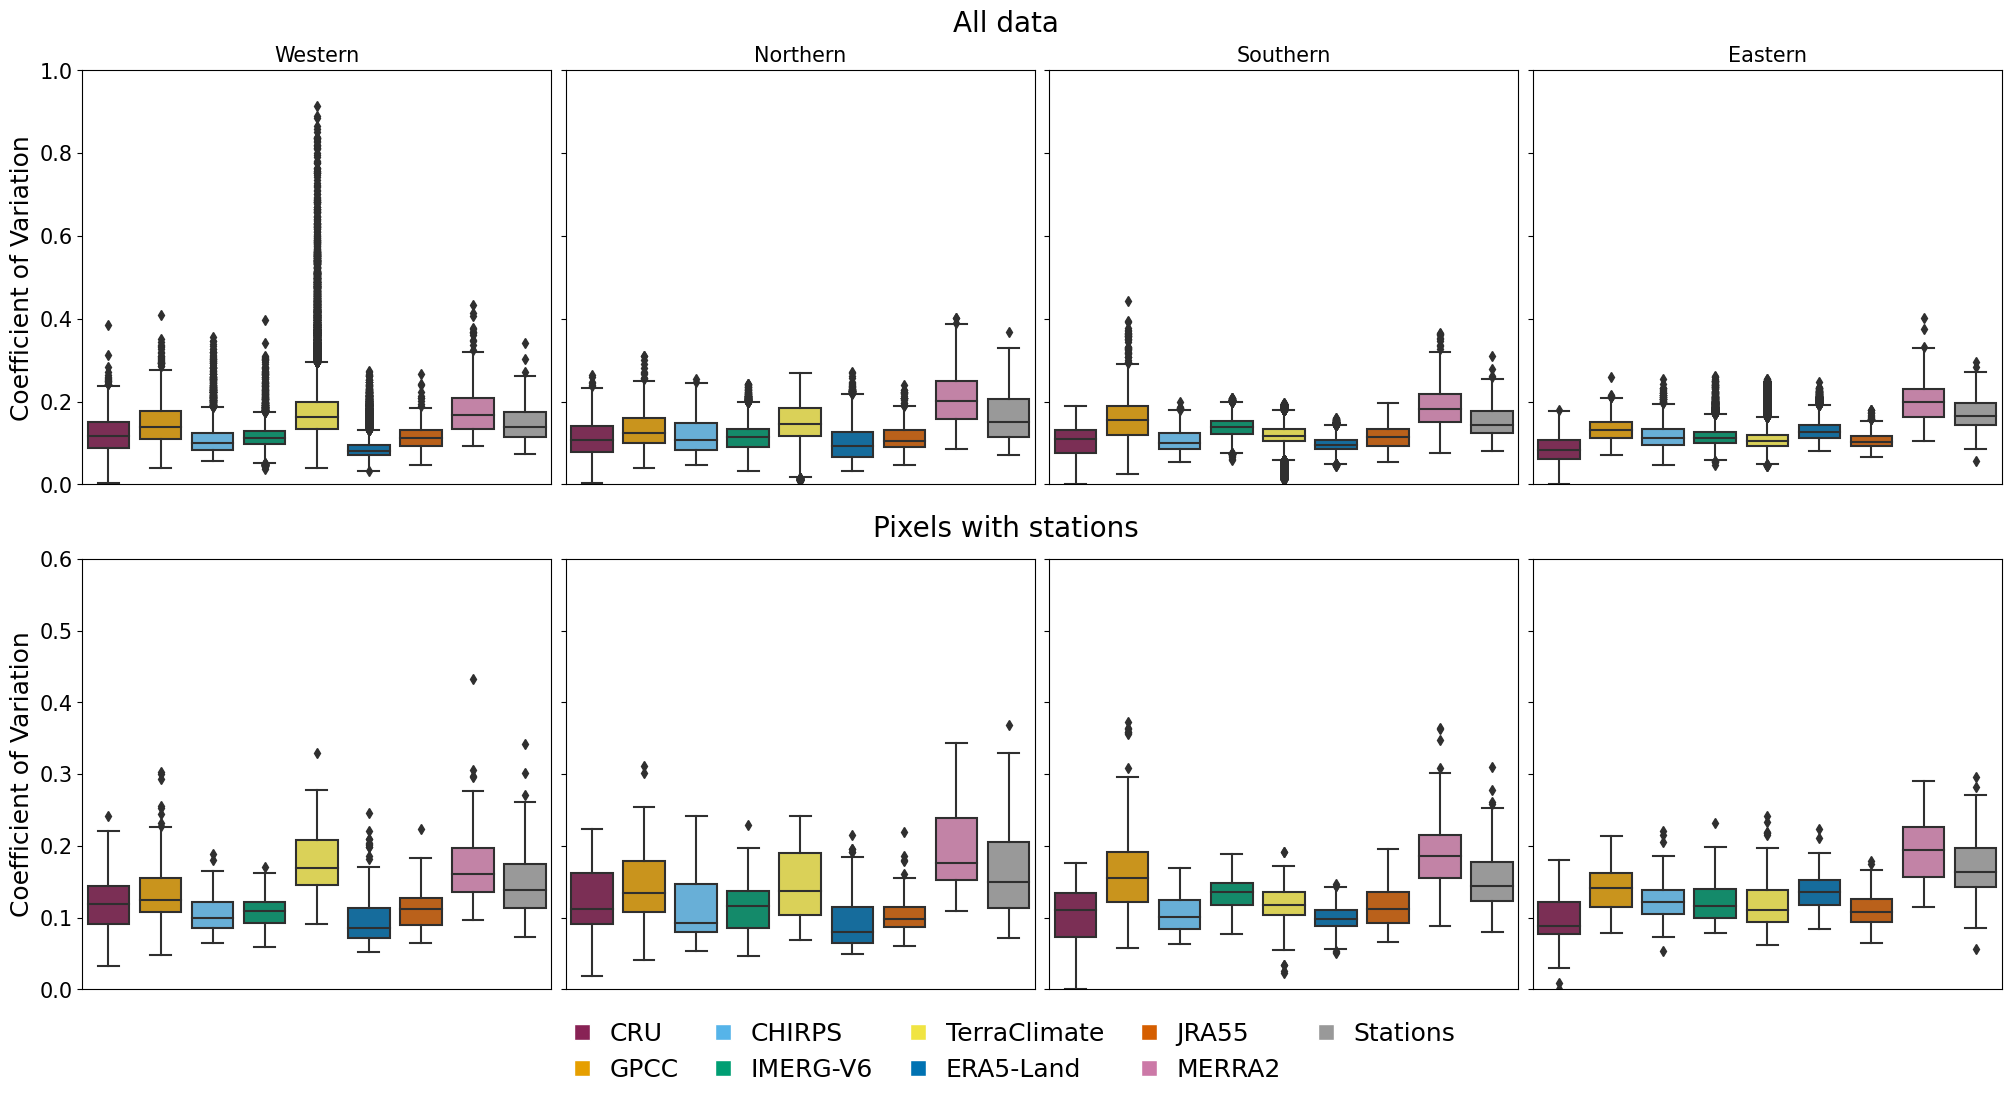

In [18]:
#plot df and df_p for each region

fig = plt.figure(layout='constrained', figsize=(20, 10))
subfigs = fig.subfigures(2, 1)
for i, dff in enumerate([df,df_p]):
    axs = subfigs[i].subplots(1, 4, sharex=True, sharey='row')
    axs = axs.flatten()
    for j, region in enumerate(regions_list):
        sns.boxplot( y='cv', data=dff[dff.Region==region], ax=axs[j], hue_order=hue_order, palette=wong, hue='Dataset',x='Dataset',dodge=False).get_legend().remove()
        
        axs[j].set_xlabel('')
        axs[j].tick_params(axis='y', which='both', labelsize=15)
        axs[j].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)

        axs[j].set_ylabel('')
    
        if i == 0:
            axs[j].set_title(region, fontsize=15)
            axs[j].set_ylim(0,1)
        else:
            axs[j].set_ylim(0,0.6)
    axs[0].set_ylabel(label_cbar)

subfigs[0].suptitle('All data', fontsize=20)
subfigs[1].suptitle('Pixels with stations', fontsize=20)

subfigs[1].legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=5, frameon=False,handletextpad=0.1,columnspacing=0.8)
#plt.tight_layout()

# season

In [6]:
folder_metric = r'Data\Datasets\amz\seasonal'
ds_dict = {}
for i, dataset in enumerate(datasets):
    ds = xr.open_dataset(os.path.join(folder_metric, dataset + '.nc'))
    #create mask from regions
    mask = regions_mask.mask(ds, lon_name='lon', lat_name='lat')
    ds['Region'] = mask
    ds_mean = ds.mean(dim='year')
    ds_mean['sd'] = ds.std(dim='year')['pr']
    ds_mean['cv'] = ds_mean['sd']/ds_mean['pr']
    ds_dict[datasets_names[i]] = ds_mean

df_stat = pd.read_csv(r'Data\Datasets\amz\seasonal\stations_ts.csv', index_col=0)
#calculate CV for each station
df_stat_mean = df_stat.groupby(['Code','season']).mean().reset_index()
df_stat_mean['sd'] = df_stat.groupby(['Code','season'])['Total'].std().reset_index()['Total']
df_stat_mean['cv'] = df_stat_mean['sd']/df_stat_mean['Total']
df_stat_mean = df_stat_mean.pivot(index='Code', columns='season', values='cv').reset_index()
#merge with stations
stations_cv = stations.merge(df_stat_mean, on = 'Code')

c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\pygeos\io.py:518: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\numpy\lib\nanfunctions.py:1878: R

In [60]:
## season
vmin = 0
vmax = 0.5
levels = 11
cmap = mpl.cm.viridis
extend_cbar = 'max'
var = 'cv'
var_stat = 'cv'
label_cbar = 'Coefficient of Variation'


#####
bounds = np.linspace(vmin,vmax,levels)
proj = ccrs.Mercator()
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend=extend_cbar )
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
seasons = ['DJF', 'MAM', 'JJA', 'SON']
extend = [-81, -42, -20, 11]
plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(ncols=len(datasets)+1, nrows=4, figsize=(20, 8), subplot_kw={'projection': proj})
#create cax in the bottom of the figure
cax = fig.add_axes([0.05, -0.08, 0.9, 0.07])

fig.colorbar(sm, cax=cax, orientation='horizontal', label=label_cbar )

for axx in axes.flatten():
        axx.add_geometries(regions.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='green', linewidth=1)
        axx.add_feature(cf.BORDERS, edgecolor='grey', linewidth=0.4)
        axx.set_extent([-81, -42, -20, 11])
        axx.coastlines()  
        # Add a title for each subplot
        #ax.set_title(datasets_names[i])
        # Remove x and y labels  
    

for i, name in enumerate(datasets_names):
    for j in range(4):
        ax = axes[j, i]
        ds = ds_dict[name]
        ds.sel(season=seasons[j])[var].plot(ax= axes[j, i] , cmap=cmap,vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), levels= levels)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title('')
        
          
        if i == 0:
            axes[j, i].set_ylabel(seasons[j], fontsize=18)
        if j == 0:
            axes[j, i].set_title(datasets_names[i], fontsize=18)
#plot the stations season metrics
for j in range(4):
    stations_cv.to_crs(proj).plot(ax=axes[j, 8], column=seasons[j], cmap=cmap,   scheme="User_Defined", 
                classification_kwds=dict(bins=bounds), linewidth=0.2, edgecolor='black', s=60)
  
  
    if j == 0:
        axes[j, 8].set_title('Stations')

plt.tight_layout()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000023F7B0828C0> (for post_execute):


KeyboardInterrupt: 

In [7]:
#create a df with all ds in ds_dict
df = pd.DataFrame()
for name in datasets_names:
    dff =  ds_dict[name].to_dataframe().reset_index().drop(columns=['lat', 'lon'])
    dff['Dataset'] = name
    df = df.append(dff)
df = df[['cv', 'Region', 'Dataset','season']].dropna().reset_index(drop=True)
#df = df.rename(columns={'mask':'region'})
df['Region'] = df['Region'].replace(regions_replace)    

C:\Users\luisg\AppData\Local\Temp\ipykernel_26908\1083661277.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_26908\1083661277.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_26908\1083661277.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_26908\1083661277.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)
C:\Users\luisg\AppData\Local\Temp\ipykernel_26908\1083661277.py:6: FutureWarning: The frame.append method is dep

In [8]:
df_stat = stations_cv.melt(id_vars=['Code', 'Region'], value_vars=['DJF', 'MAM', 'JJA', 'SON'], var_name='season', value_name='cv').dropna()
df_stat.drop(columns=['Code'], inplace=True)
df_stat['Dataset'] = 'Stations'
df = df.append(df_stat)


C:\Users\luisg\AppData\Local\Temp\ipykernel_26908\820520128.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_stat)


In [40]:
df.sort_values(by='cv', ascending=False).head(10)

,cv,Region,Dataset,season
755950,2.303028,Western,TerraClimate,JJA
758854,2.281702,Western,TerraClimate,JJA
755954,2.279241,Western,TerraClimate,JJA
758858,2.235969,Western,TerraClimate,JJA
758862,2.193170,Western,TerraClimate,JJA
761762,2.175506,Western,TerraClimate,JJA
1484,2.140196,Eastern,Stations,JJA
767602,2.102456,Western,TerraClimate,JJA
764674,2.075836,Western,TerraClimate,JJA
761766,2.052750,Western,TerraClimate,JJA


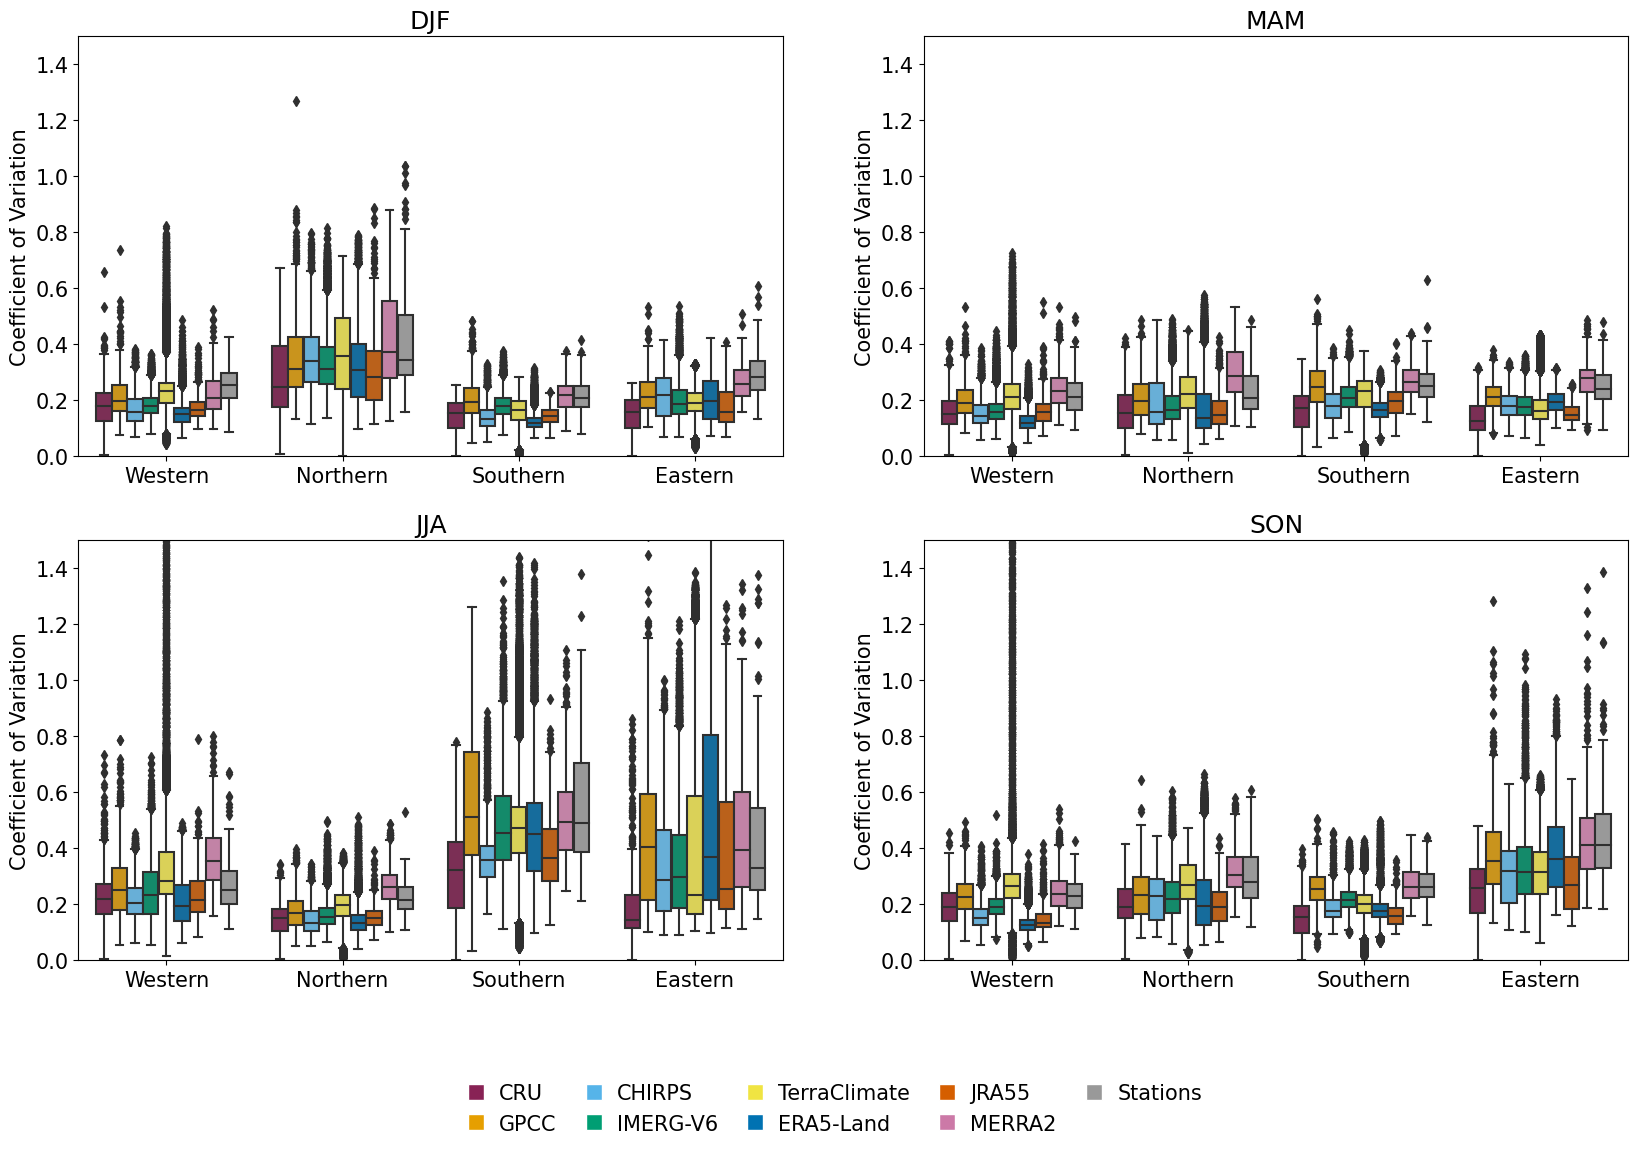

In [10]:
#plot box plot for each season
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 12))
axes = axes.flatten()
for i, season in enumerate(seasons):
    ax = axes[i]
    sns.boxplot(x="Region", y="cv", hue="Dataset", data=df[df['season']==season], ax=ax, hue_order=hue_order, palette=wong)
    ax.set_title(season)
    ax.set_xlabel('')
    ax.set_ylabel('Coefficient of Variation')
    ax.legend(loc='upper right')
    ax.legend_.remove()
    ax.set_ylim(0, 1.5)

fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.05), loc='lower center', ncol=5, frameon=False,handletextpad=0.1,columnspacing=0.8)

# point

In [9]:
stations_season = stations_cv.melt(id_vars=['Code', 'Region'], value_vars=['DJF', 'MAM', 'JJA', 'SON'], var_name='season', value_name='cv').dropna().reset_index(drop=True)
stations_season = stations_season.merge(stations[['Code','geometry']], on='Code')
data = stations_season[['geometry','cv','season']].copy()
data['lon'] = data['geometry'].apply(lambda p: p.x)
data['lat'] = data['geometry'].apply(lambda p: p.y)
data = data.drop(columns=['geometry'])

In [10]:
metrics_dict = {}
for name in datasets_names:
    ds = ds_dict[name].copy()
    # Step 2: Assign each point to the grid cells of the 'ds' DataArray
    ds_grid_lon, ds_grid_lat = ds.lon.values, ds.lat.values
    data['lon_bin'] = np.digitize(data['lon'], ds_grid_lon)
    data['lat_bin'] = np.digitize(data['lat'], ds_grid_lat)
    for var in ['cv']:

        # Step 3: Compute the mean value for each grid cell and each year
        grid_cells = data.groupby(['lat_bin', 'lon_bin','season'])[var].mean().reset_index()
        # Step 4: Create an empty DataArray with NaN values
        empty_grid = np.full((4,len(ds_grid_lat), len(ds_grid_lon)), np.nan)
        # Step 5: Fill the DataArray with the computed mean values for each year
        for _, row in grid_cells.iterrows():
            season_idx = np.where(data['season'].unique() == row['season'])[0][0]
            #year_idx = np.where(data['year'].unique() == row['year'])[0][0]
            lat_idx, lon_idx = row['lat_bin'], row['lon_bin']
            lat_idx, lon_idx = int(lat_idx), int(lon_idx)
            empty_grid[season_idx,lat_idx - 1, lon_idx - 1] = row[var]
        # Step 6: Create an xarray DataArray from the result with the year dimension
        #year_coords = data['year'].unique()
        season_coords = data['season'].unique()
        data_array = xr.DataArray(empty_grid,
                                    dims=('season','lat', 'lon'),
                                    coords={'season':season_coords, 'lat': ds_grid_lat, 'lon': ds_grid_lon})
        # Calculate various metrics
        ds[var + '_stat'] = data_array
    metrics_dict[name] = ds

In [11]:
df_compare = pd.DataFrame()
for name in datasets_names:
    df_comparef =  metrics_dict[name].to_dataframe().dropna().reset_index()
    df_comparef['Dataset'] = name
    df_compare = df_compare.append(df_comparef)

df_compare = df_compare[['season', 'Region', 'Dataset','cv','cv_stat']]
df_compare['Region'] = df_compare['Region'].replace(regions_replace)
#append stat
df_compare = df_compare.append(df_stat)

C:\Users\luisg\AppData\Local\Temp\ipykernel_26908\3117219468.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(df_comparef)
C:\Users\luisg\AppData\Local\Temp\ipykernel_26908\3117219468.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(df_comparef)
C:\Users\luisg\AppData\Local\Temp\ipykernel_26908\3117219468.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(df_comparef)
C:\Users\luisg\AppData\Local\Temp\ipykernel_26908\3117219468.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_compare = df_compare.append(df_comparef)
C:\Users\luisg\A

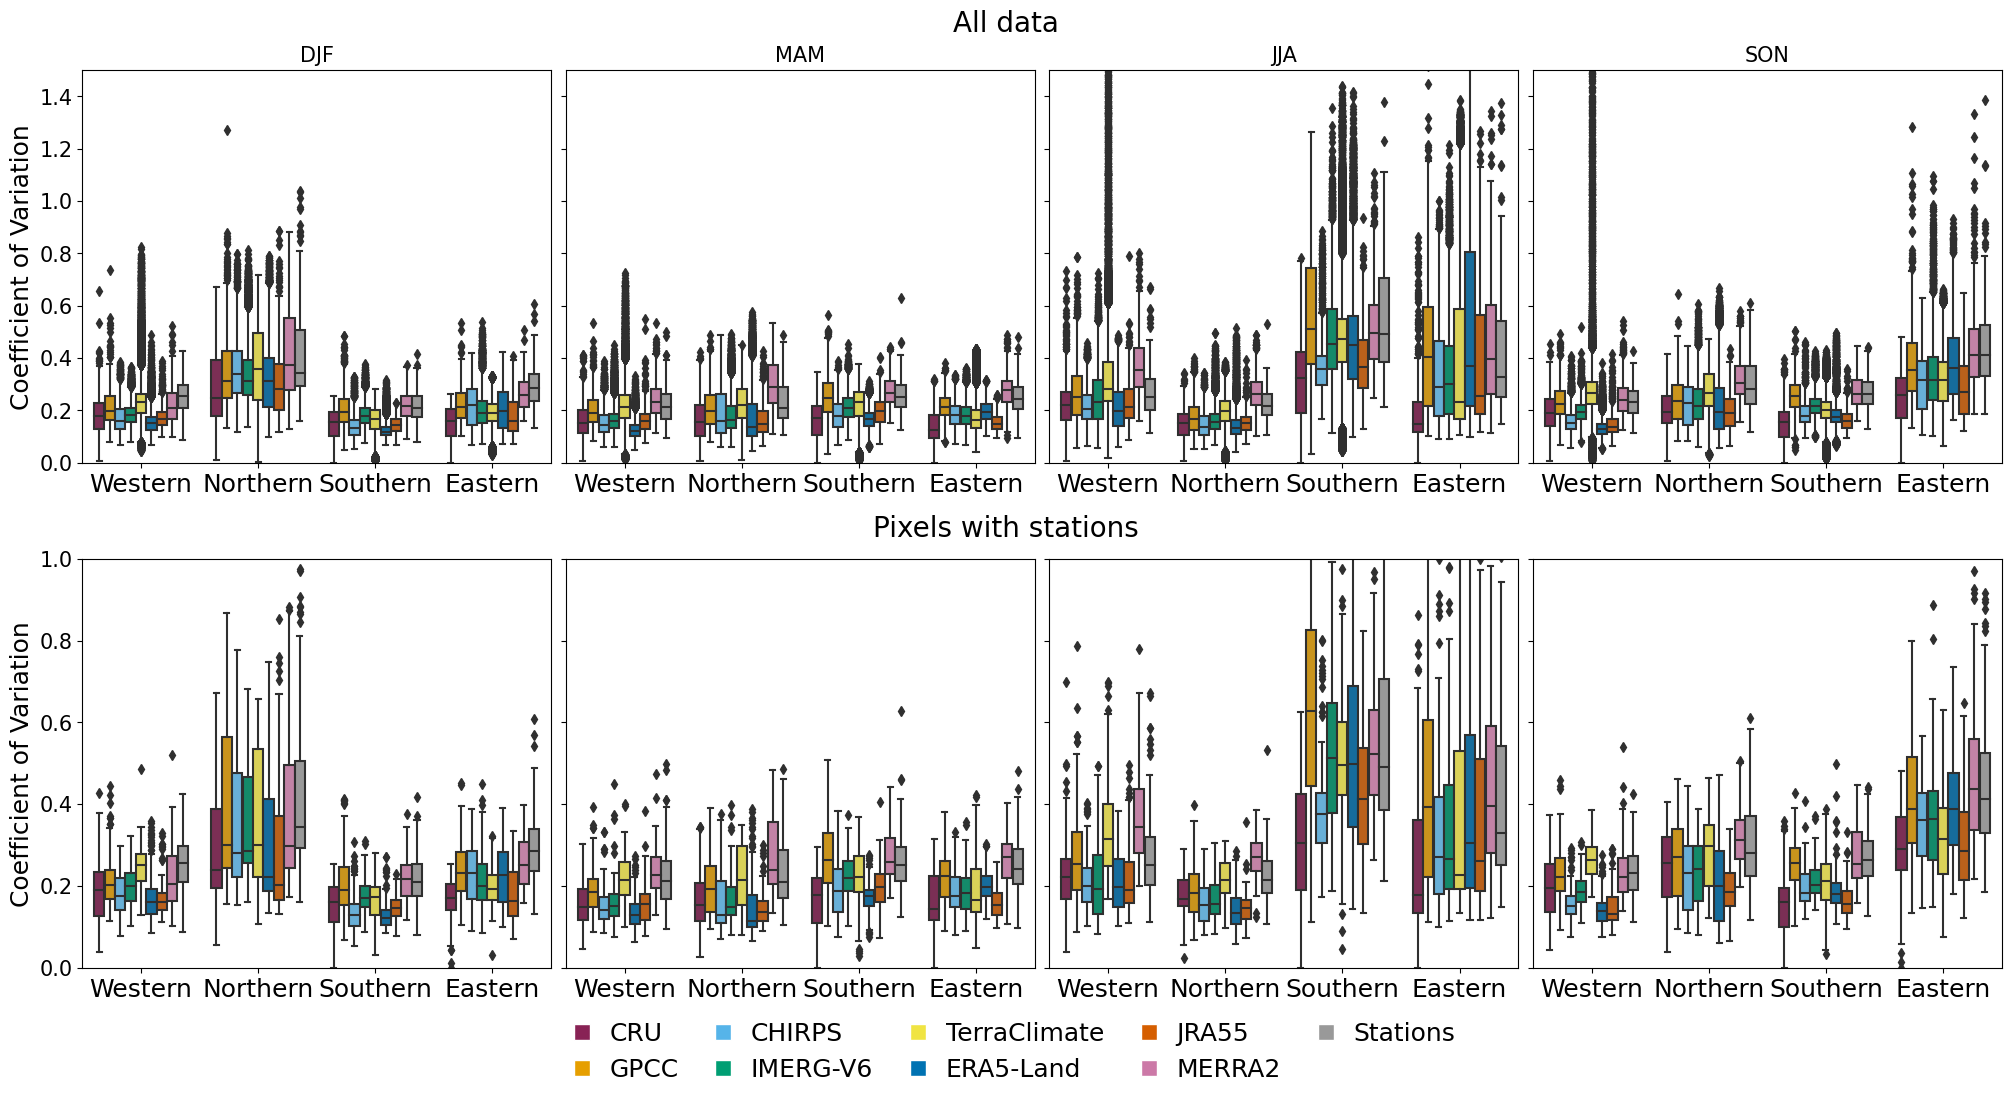

In [14]:
#plot df and df_p for each region

fig = plt.figure(layout='constrained', figsize=(20, 10))
subfigs = fig.subfigures(2, 1)
for i, dff in enumerate([df,df_compare]):
    axs = subfigs[i].subplots(1, 4, sharex=True, sharey='row')
    axs = axs.flatten()
    for j, season in enumerate(seasons): 
        sns.boxplot(x="Region", y="cv", hue="Dataset", data=dff[dff['season']==season], ax=axs[j], hue_order=hue_order, palette=wong).get_legend().remove()
    
        axs[j].set_xlabel('')
        axs[j].tick_params(axis='y', which='both', labelsize=15)
        #axs[j].tick_params(
        #    axis='x',          # changes apply to the x-axis
        #    which='both',      # both major and minor ticks are affected
        #    bottom=False,      # ticks along the bottom edge are off
        #    top=False,         # ticks along the top edge are off
        #    labelbottom=False)
#
        axs[j].set_ylabel('')
    
        if i == 0:
            axs[j].set_title(season, fontsize=15)
            axs[j].set_ylim(0,1.5)
        else:
            axs[j].set_ylim(0,1)
    axs[0].set_ylabel(label_cbar)

subfigs[0].suptitle('All data', fontsize=20)
subfigs[1].suptitle('Pixels with stations', fontsize=20)

subfigs[1].legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=5, frameon=False,handletextpad=0.1,columnspacing=0.8)
#plt.tight_layout()

In [44]:
df_rr = df_compare.groupby(['Region','season', 'Dataset']).apply(lambda x: x['cv'].corr(x['cv_stat'])).reset_index(name='corr')
df_rr.groupby(['season','Region'])['corr'].mean()

season  Region  
DJF     Eastern     0.538422
        Northern    0.867812
        Southern    0.346590
        Western     0.250126
JJA     Eastern     0.785713
        Northern    0.300928
        Southern    0.527885
        Western     0.447154
MAM     Eastern     0.423744
        Northern    0.627342
        Southern    0.347839
        Western     0.034908
SON     Eastern     0.465345
        Northern    0.676357
        Southern    0.272514
        Western     0.143883
Name: corr, dtype: float64

In [37]:
marker_list = ['*','.' ]
marker_dict = {'DJF':'*', 'JJA':'.'}
marker_legend = [Line2D([0], [0],  marker='*', color='w', label='DJF', markerfacecolor='black', markersize=12),
                  Line2D([0], [0],  marker='.', color='w', label='JJA', markerfacecolor='black', markersize=12)]
marker_legend = marker_legend +  legend_elements_b


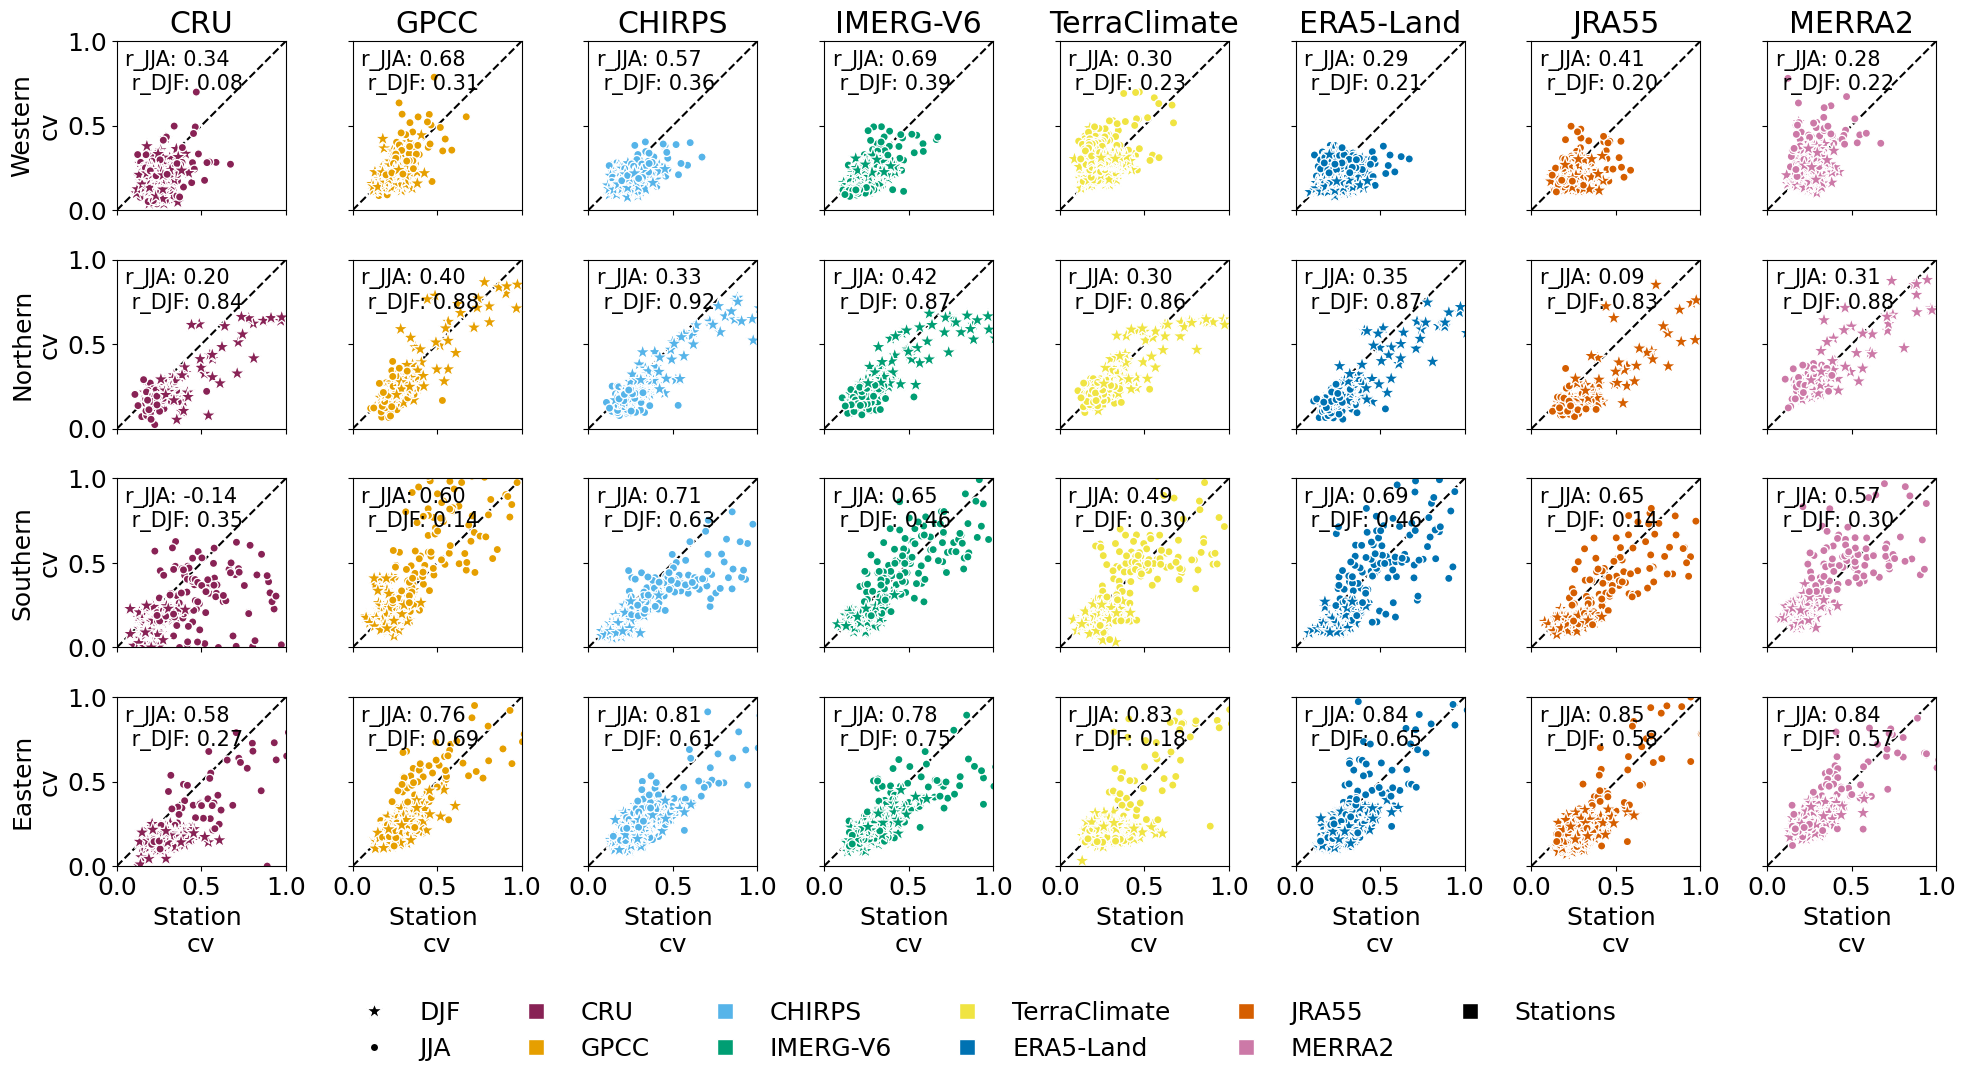

In [38]:
fig, axes = plt.subplots(4,8, figsize=(20,10), sharex=True, sharey=True)
limm = 1
df_ss = df_compare[df_compare['season'].isin(['DJF', 'JJA'])]
for i, name in enumerate(datasets_names):
    df_ds = df_ss[df_ss ['Dataset'] == name]
    for j, region in enumerate(regions_list):
        df_plot = df_ds[df_ds['Region'] == region]
        sns.scatterplot(data=df_plot,x='cv_stat', y='cv', ax=axes[j,i], s=140,
                        color=wong[i], legend=False, style='season',style_order=['DJF', 'JJA'],
                        markers=marker_dict)
        
        axes[j,i].set_xlabel('Station \ncv')
        axes[j,i].set_ylabel(region + '\ncv')
        axes[j,i].set_xlim(0,limm)
        axes[j,i].set_ylim(0,limm)
        axes[j,i].plot([0,limm],[0,limm], color='black', linestyle='--',zorder=-30)
        axes[j,i].set_aspect('equal', 'box')
        dff_jja = df_plot[df_plot['season'] == 'JJA']
        corr_jja = dff_jja['cv_stat'].corr(dff_jja['cv'])
        dff_djf = df_plot[df_plot['season'] == 'DJF']
        corr_djf = dff_djf['cv_stat'].corr(dff_djf['cv'])
        axes[j,i].text(0.05, 0.95, f'r_JJA: {corr_jja:.2f} \n r_DJF: {corr_djf:.2f}', transform=axes[j,i].transAxes, fontsize=15, verticalalignment='top')
    axes[0,i].set_title(name)
    #calculate the Coefficient of determination
    #axes[7].legend(bbox_to_anchor=(0.5, -0.limm), loc='lower center', ncol=3, frameon=False, fontsize=1limm)

    
    
fig.legend(handles=marker_legend, bbox_to_anchor=(0.5, -0.1), loc='lower center', ncol=6, frameon=False)
plt.tight_layout()